In [27]:
import numpy
import pandas

import hoggorm as ho
import hoggormplot as hopl
import matplotlib.pyplot as plt
import seaborn as sns

## Load original data

In [4]:
#df = pandas.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=',')
data = pandas.read_table("./iris_data.txt", sep=',')
XvarNames = list(data.columns[0:4])
data[:3]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Add binary masks for each class
For each class we need a feature vector with `True` when the class is on/present, and `False` otherwise.This is used by Hoggorm

In [6]:
classNameMapping = {
    'Iris-setosa': 'Setosa',
    'Iris-versicolor': 'Versicolor',
    'Iris-virginica': 'Virginica',
}
classNames = list(classNameMapping.keys())
assert classNames == list(data['class'].unique())
YVarNames = list(classNameMapping.values())

for className, columnName in classNameMapping.items():
    data[columnName] = data['class'] == className

data.iloc[[0, 70, 140]]

,sepal length,sepal width,petal length,petal width,class,Setosa,Versicolor,Virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,True,False,False
70,5.9,3.2,4.8,1.8,Iris-versicolor,False,True,False
140,6.7,3.1,5.6,2.4,Iris-virginica,False,False,True


## Split data into training and test sets

In [23]:
trainRatio = 0.7
trainRows = numpy.random.random(size=data.shape[0]) < trainRatio

trainData = data[trainRows]
testData = data[numpy.invert(trainRows)]

assert trainData.shape[0] + testData.shape[0] == 150

## PCR classifier

loo


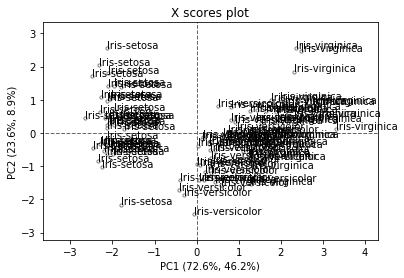

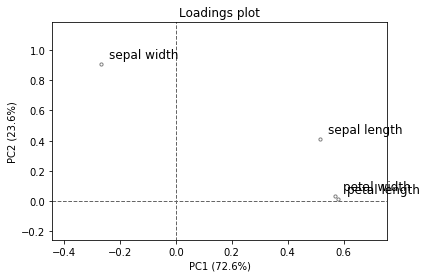

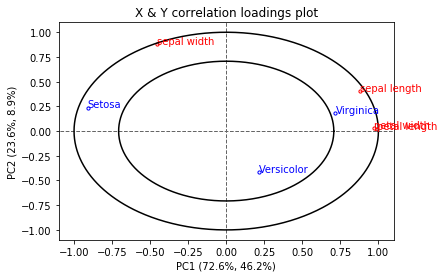

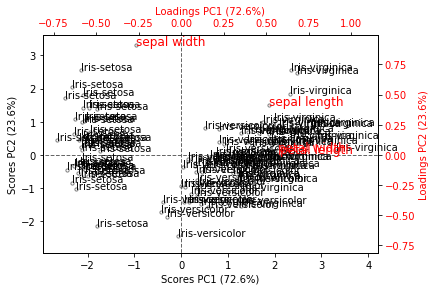

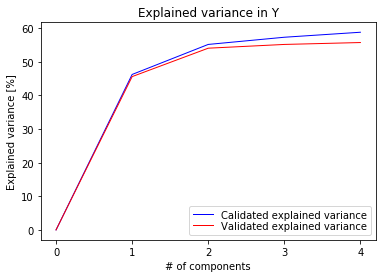

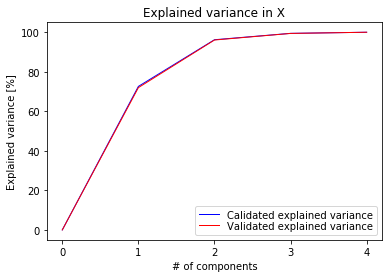

In [8]:
modelPCR = ho.nipalsPCR(arrX=trainData[XvarNames].values, arrY=trainData[YVarNames].values,
                        Xstand=True, Ystand=False, cvType=['loo'])

hopl.plot(modelPCR, comp=[1,2],
          plots=[1, 2, 3, 4, 6],
          objNames = list(trainData['class']),
          XvarNames = XvarNames,
          YvarNames = YVarNames)

hopl.explainedVariance(modelPCR, validated=[True], which=['X'])

## Test PCR model predictions

In [26]:
predRes = modelPCR.Y_predict(testData[XvarNames].values, numComp=2)

pcrResults = testData.copy()
pcrResults['predicted'] = list(map(lambda winner_idx: classNames[winner_idx], predRes.argmax(axis=1)))
pcrResults[:3]
correctRows = pcrResults['predicted'] == pcrResults['class']
correct, incorrect = pcrResults[correctRows], pcrResults[numpy.invert(correctRows)]

correctRatio = (correct.shape[0] / pcrResults.shape[0])
print('correct {:.2f}%'.format(correctRatio*100))
incorrect

correct 78.85%


,sepal length,sepal width,petal length,petal width,class,Setosa,Versicolor,Virginica,predicted
41,4.5,2.3,1.3,0.3,Iris-setosa,True,False,False,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor,False,True,False,Iris-virginica
61,5.9,3.0,4.2,1.5,Iris-versicolor,False,True,False,Iris-virginica
63,6.1,2.9,4.7,1.4,Iris-versicolor,False,True,False,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor,False,True,False,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor,False,True,False,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor,False,True,False,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica,False,False,True,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica,False,False,True,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica,False,False,True,Iris-versicolor
